In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('MEDV', axis=1).values
y = boston.MEDV.values

In [4]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1,1)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

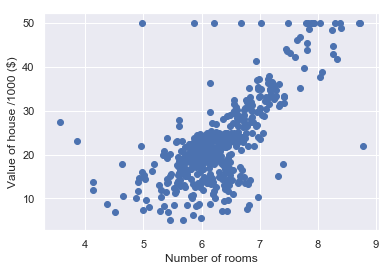

In [7]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

### Fitting a regression model

In [8]:
from sklearn import linear_model

In [9]:
reg = linear_model.LinearRegression()

In [10]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
prediction_space = np.linspace(min(X_rooms),
                              max(X_rooms)).reshape(-1,1)

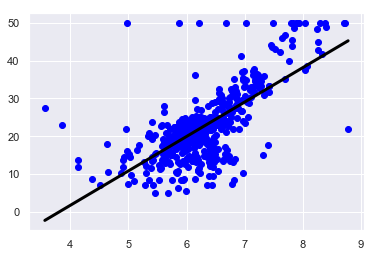

In [12]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black', linewidth=3)
plt.show()

In [13]:
df = pd.read_csv('gapminder.csv')
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [14]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')
df = df.fillna(method='ffill')
# Create arrays for features and target variable
y = np.array(df.life).astype(np.float16)
X = np.array(df.fertility).astype(np.float16)

In [15]:
max(y), max(X)

(83.56, 9.23)

In [16]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (10111,)
Dimensions of X before reshaping: (10111,)
Dimensions of y after reshaping: (10111, 1)
Dimensions of X after reshaping: (10111, 1)


In [17]:
import seaborn as sns

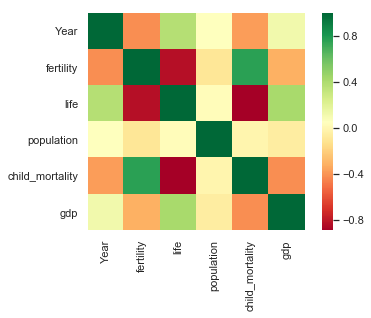

In [18]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
Country            10111 non-null object
Year               10111 non-null int64
fertility          10111 non-null float64
life               10111 non-null float64
population         10111 non-null float64
child_mortality    10111 non-null float64
gdp                10111 non-null float64
region             10111 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 632.0+ KB


In [20]:
df.describe()

,Year,fertility,life,population,child_mortality,gdp
count,10111.000000,10111.000000,10111.000000,1.011100e+04,10111.000000,10111.000000
mean,1988.514588,4.028242,64.078600,2.560084e+07,76.181140,14242.931065
std,14.430849,2.012953,11.122779,1.032232e+08,77.507769,20431.346660
min,1964.000000,0.836000,6.000000,1.170000e+03,2.000000,142.000000
25%,1976.000000,2.176991,56.282500,8.875915e+05,17.000000,2282.500000
50%,1989.000000,3.630000,67.157000,4.772216e+06,46.300000,6563.000000
75%,2001.000000,5.903000,72.484000,1.476182e+07,113.500000,17146.000000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.800000,182668.000000


In [21]:
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [22]:
def auto(): 
    print('X_train, X_test, y_train, y_test = train_test_split()')
auto()

X_train, X_test, y_train, y_test = train_test_split()


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [24]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [25]:
reg_all.score(X_test, y_test)

0.683251429881339

In [26]:
df = pd.read_csv('gapminder.csv')
df = df.fillna(method='ffill')
df = df.groupby(['Country']).mean()

y = np.array(df.life).reshape(-1,1)
X_fertility = np.array(df.fertility).reshape(-1,1)

0.7475561111390951


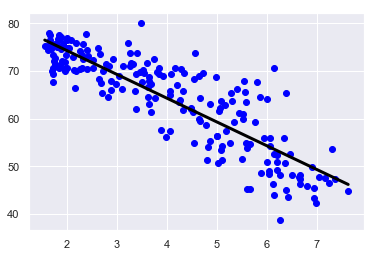

In [27]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [32]:
df = pd.read_csv('gapminder.csv')
df = df.fillna(method='ffill')
df = df.groupby(['Country']).mean()
df.head(3)

,Year,fertility,life,population,child_mortality,gdp
Country,,,,,,
Afghanistan,1988.5,7.35978,47.35280,18272040.82,203.1980,1187.20
Albania,1988.5,3.29010,71.64512,2817009.14,57.4434,5012.52
Algeria,1988.5,5.06534,62.26872,24025124.20,106.0820,9662.18


In [35]:
y = df['life'].values
X = df.drop('life', axis=1).values

In [37]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8474611027951147
Root Mean Squared Error: 3.625262762820296


In [41]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.85478044 0.93229622 0.80190805 0.90611618 0.81569073]
Average 5-Fold CV Score: 0.8621583229958458
